# Week4授業前課題2 住宅価格の予測

## 1.このテキストについて

### テキストの目的
- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする

どのように学ぶか
定番のデータセットを通じて、回帰問題を解く流れやライブラリの使い方を学びます。

## 2.住宅価格の回帰


Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

House Prices: Advanced Regression Techniques

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

## 3.データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

House Prices: Advanced Regression Techniques | Kaggle

In [1]:
# Numpy
import numpy as np

# Dataframe operations
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scalers
from sklearn.preprocessing import StandardScaler

# Data Split
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# from sklearn.svm import LinearSVC

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Tuning parameters
from sklearn.model_selection import GridSearchCV

# Dicision Tree
import pydotplus
from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
from sklearn import datasets
from IPython.display import Image

# Random forest
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../../data/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 4.回帰問題の流れ


回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

### 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数GrLivAreaとYearBuiltの2つだけを利用することにします。


## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [3]:
df2 = df.loc[:,['GrLivArea', 'YearBuilt']]
df2.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### ■データの可視化・前処理

In [4]:
# データの用意
df3 = df.loc[:,['GrLivArea', 'YearBuilt', 'SalePrice']]
df3.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [5]:
# # YearBuiltを築年数へ変換
# df3['YearBuilt'] = df3['YearBuilt'].map(lambda x: 2020 - x)
# df3.head()

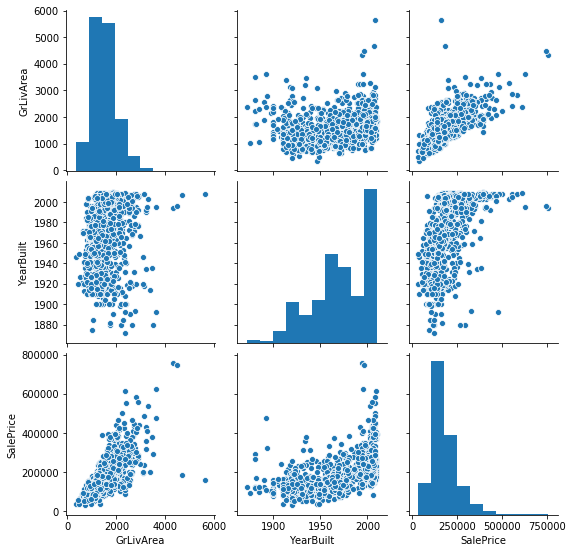

In [6]:
# ヒストグラム・散布図で全体像や相関を確認
sns.pairplot(df3)
plt.show()

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


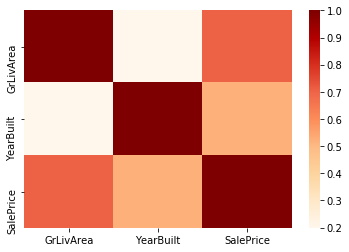

In [7]:
# 相関係数を確認
sns.heatmap(df3.corr(), cmap='OrRd')
df3.corr()

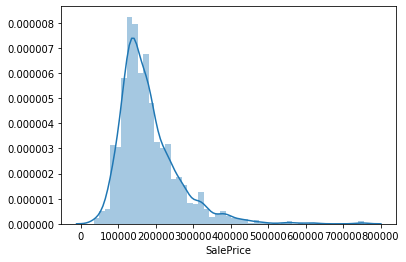

対数変換前 歪度 : 1.8828757597682129
対数変換前 尖度 : 6.536281860064529


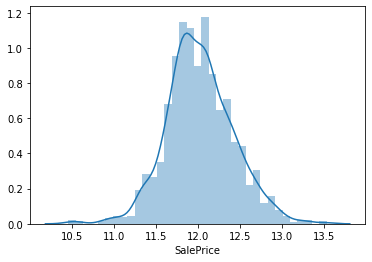

対数変換後 歪度 : 0.12133506220520406
対数変換後 尖度 : 0.8095319958036296


In [8]:
# SalePriceを対数変換
sns.distplot(df3['SalePrice'])
plt.show()
print('対数変換前 歪度 : {}'.format(df3['SalePrice'].skew()))
print('対数変換前 尖度 : {}'.format(df3['SalePrice'].kurt()))
df3['SalePrice'] = df3['SalePrice'].map(np.log)
sns.distplot(df3['SalePrice'])
plt.show()
print('対数変換後 歪度 : {}'.format(df3['SalePrice'].skew()))
print('対数変換後 尖度 : {}'.format(df3['SalePrice'].kurt()))

In [9]:
# # YearBuiltを対数変換
# sns.distplot(df3['YearBuilt'])
# plt.show()
# print('対数変換前 歪度 : {}'.format(df3['YearBuilt'].skew()))
# print('対数変換前 尖度 : {}'.format(df3['YearBuilt'].kurt()))
# df3['YearBuilt'] = df3['YearBuilt'].map(np.log)
# sns.distplot(df3['YearBuilt'])
# plt.show()
# print('対数変換後 歪度 : {}'.format(df3['YearBuilt'].skew()))
# print('対数変換後 尖度 : {}'.format(df3['YearBuilt'].kurt()))

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.19901,0.700927
YearBuilt,0.199010,1.00000,0.586570
SalePrice,0.700927,0.58657,1.000000


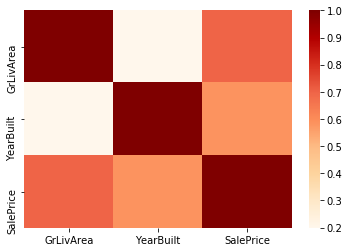

In [10]:
# 相関係数を確認
sns.heatmap(df3.corr(), cmap='OrRd')
df3.corr()

### ■モデル作成

In [11]:
x = df3.loc[:, ['GrLivArea', 'YearBuilt']]
y = df3.loc[:, 'SalePrice']

# 線形回帰クラスの初期化
model = LinearRegression()

# データを分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# トレーニングデータで学習
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# 決定係数を表示
print('決定係数R^2(train) : {:.3f}'.format(model.score(x_train, y_train)))
print('決定係数R^2(test) : {:.3f}'. format(model.score(x_test, y_test)))

# 切片・回帰係数を表示
print('回帰係数 : \n{}'.format(pd.Series(model.coef_.reshape(2), index=x.columns)))
print('切片 : {:.3f}'.format(model.intercept_))

# テストデータで予測
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

# MSE（平均二乗誤差）
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MAE(平均二乗誤差)(train) : {:.3f}'.format(mse_train))
print('MAE(平均二乗誤差)(test) : {:.3f}'.format(mse))

決定係数R^2(train) : 0.712
決定係数R^2(test) : 0.664
回帰係数 : 
GrLivArea    0.000489
YearBuilt    0.006101
dtype: float64
切片 : -0.748
MAE(平均二乗誤差)(train) : 0.047
MAE(平均二乗誤差)(test) : 0.052


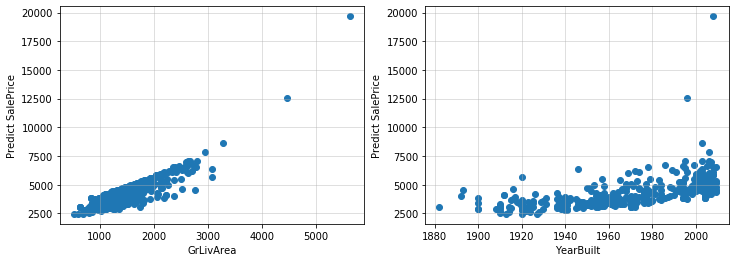

In [13]:
# グラフ表示用の関数
def show_graph(x_test, y_pred):
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.scatter(x_test['GrLivArea'], 2**y_pred)
    ax2.scatter(x_test['YearBuilt'], 2**y_pred)
    
    ax1.set_xlabel('GrLivArea')
    ax1.set_ylabel('Predict SalePrice')
    
    ax2.set_xlabel('YearBuilt')
    ax2.set_ylabel('Predict SalePrice')

    ax1.grid(True, alpha=0.5)
    ax2.grid(True, alpha=0.5)

    plt.show()
    
show_graph(x_test, y_pred)

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### サポートベクターマシン(回帰)

In [14]:
# サポートベクターマシン(回帰)クラスを初期化
model2 = SVR()

# トレーニングデータで学習
model2.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
# 決定係数を表示
print('決定係数R^2(train) : {:.3f}'.format(model2.score(x_train, y_train)))
print('決定係数R^2(test) : {:.3f}'. format(model2.score(x_test, y_test)))

# テストデータで予測
y_pred2 = model2.predict(x_test)
y_train_pred2 = model2.predict(x_train)

# MSE（平均二乗誤差）
mse2 = mean_squared_error(y_test, y_pred2)
mse2_train = mean_squared_error(y_train, y_train_pred2)
print('MAE(平均二乗誤差)(train) : {:.3f}'.format(mse2_train))
print('MAE(平均二乗誤差)(test) : {:.3f}'.format(mse2))

決定係数R^2(train) : 0.723
決定係数R^2(test) : 0.727
MAE(平均二乗誤差)(train) : 0.045
MAE(平均二乗誤差)(test) : 0.042


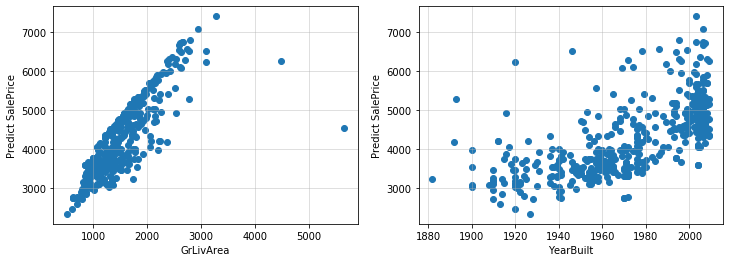

In [16]:
show_graph(x_test, y_pred2)

### 決定木

In [17]:
# 決定木回帰クラスの初期化
model3 = DecisionTreeRegressor()

# 訓練データで決定木回帰を学習
model3.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
# 決定係数を表示
print('決定係数R^2(train) : {:.3f}'.format(model3.score(x_train, y_train)))
print('決定係数R^2(test) : {:.3f}'. format(model3.score(x_test, y_test)))

# 予測
y_pred3 = model3.predict(x_test)
y_train_pred3 = model3.predict(x_train)

# MSE（平均二乗誤差）
mse3 = mean_squared_error(y_test, y_pred3)
mse3_train = mean_squared_error(y_train, y_train_pred3)
print('MAE(平均二乗誤差)(train) : {:.3f}'.format(mse3_train))
print('MAE(平均二乗誤差)(test) : {:.3f}'.format(mse3))

決定係数R^2(train) : 0.997
決定係数R^2(test) : 0.563
MAE(平均二乗誤差)(train) : 0.001
MAE(平均二乗誤差)(test) : 0.068


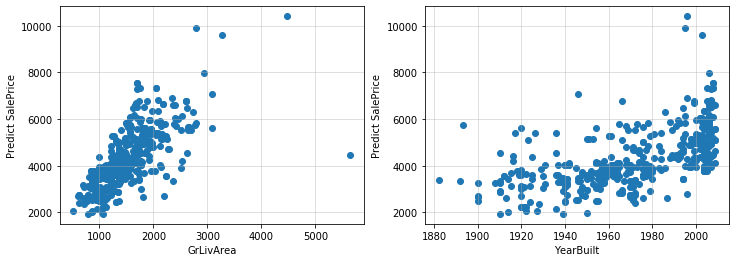

In [19]:
show_graph(x_test, y_pred3)

### ■ランダムフォレスト回帰

In [20]:
# 決定木回帰クラスの初期化
model4 = RandomForestRegressor()

# 訓練データで決定木回帰を学習
model4.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
# 決定係数を表示
print('決定係数R^2(train) : {:.3f}'.format(model4.score(x_train, y_train)))
print('決定係数R^2(test) : {:.3f}'. format(model4.score(x_test, y_test)))

# 予測
y_pred4 = model4.predict(x_test)
y_train_pred4 = model4.predict(x_train)

# MSE（平均二乗誤差）
mse4 = mean_squared_error(y_test, y_pred4)
mse4_train = mean_squared_error(y_train, y_train_pred4)
print('MAE(平均二乗誤差)(train) : {:.3f}'.format(mse4_train))
print('MAE(平均二乗誤差)(test) : {:.3f}'.format(mse4))

決定係数R^2(train) : 0.956
決定係数R^2(test) : 0.725
MAE(平均二乗誤差)(train) : 0.007
MAE(平均二乗誤差)(test) : 0.043


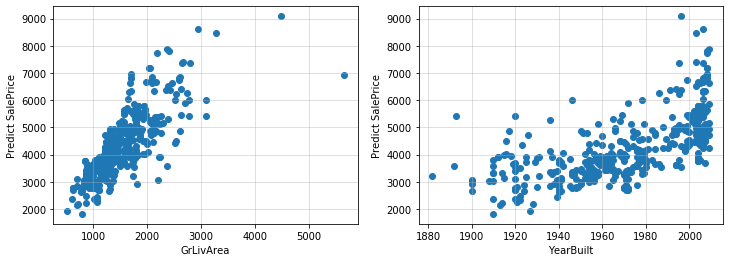

In [22]:
show_graph(x_test, y_pred4)

### 表作成・比較・考察

In [23]:
results = {'LinearRegression':
           {'R2_train': model.score(x_train, y_train), 
            'R2_test': model.score(x_test, y_test), 
            'MAE_train': mse_train, 
            'MAE_test': mse},
           
           'SVR': 
           {'R2_train': model2.score(x_train, y_train), 
            'R2_test': model2.score(x_test, y_test), 
            'MAE_train': mse2_train, 
            'MAE_test': mse2}, 
           
           'DecisionTreeRegressor':
           {'R2_train': model3.score(x_train, y_train), 
            'R2_test': model3.score(x_test, y_test), 
            'MAE_train': mse3_train, 
            'MAE_test': mse3}, 
           
           'RandomForestRegressor':
           {'R2_train': model4.score(x_train, y_train), 
            'R2_test': model4.score(x_test, y_test), 
            'MAE_train': mse4_train, 
            'MAE_test': mse4}
          }

In [24]:
pd.DataFrame(results)

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
R2_train,0.711953,0.722600,0.996640,0.955926
R2_test,0.664459,0.726914,0.562943,0.724539
MAE_train,0.046537,0.044817,0.000543,0.007121
MAE_test,0.051845,0.042195,0.067530,0.042562


【考察】

- ランダムフォレストの決定係数やMSEが最もよく、次いでSVR、線形回帰、決定木回帰となっている。
- 決定木やランダムフォレストに関しては、トレーニングデータでの精度が非常に高く、テストデータの予測精度が比較的悪化している。
- そのため、ややオーバーフィッティング気味である可能性が考えられる。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

KaggleのNotebooksも参考にできます。

House Prices: Advanced Regression Techniques | Kaggle

### 1 カテゴリ変数を数値に変換　※欠損値は変換しない

In [25]:
# 全変全一括変換用関数
def dummy_variable_all(df, sort_frequence=True, dropna=True, map_show=False):
    """
    オブジェクト型の変数を数値へ一括変換する処理。
    
    Parameters
    ----------------
    df : pd.DataFrame
      データセットのDataFrame。
    sort_frequence : bool
      数値変換の順番を頻度順にするか
    dropna : bool
      nullを同様に数値へ変換するか
    map_show : bool
      変換するname mapを標準出力するか

    Returns
    ----------------
    df : pd.DataFrame
    """
    
    for column_name in df:
        if np.dtype(df[column_name]) == 'object':
            if sort_frequence:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_values(ascending=False).index
            else:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_index().index

            name_map = {}
            for i, value in enumerate(unique_value):
                name_map[value] = i
            if map_show:
                print('column_name :', column_name)
                print('replace :', name_map)
            df[column_name] = df[column_name].map(name_map)
        else:
            pass
    return df

In [26]:
print('カテゴリ変数を下記内容で数値に置換')
df5 = dummy_variable_all(df.copy(), dropna=True, map_show=True)

カテゴリ変数を下記内容で数値に置換
column_name : MSZoning
replace : {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4}
column_name : Street
replace : {'Pave': 0, 'Grvl': 1}
column_name : Alley
replace : {'Grvl': 0, 'Pave': 1}
column_name : LotShape
replace : {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
column_name : LandContour
replace : {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}
column_name : Utilities
replace : {'AllPub': 0, 'NoSeWa': 1}
column_name : LotConfig
replace : {'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}
column_name : LandSlope
replace : {'Gtl': 0, 'Mod': 1, 'Sev': 2}
column_name : Neighborhood
replace : {'NAmes': 0, 'CollgCr': 1, 'OldTown': 2, 'Edwards': 3, 'Somerst': 4, 'Gilbert': 5, 'NridgHt': 6, 'Sawyer': 7, 'NWAmes': 8, 'SawyerW': 9, 'BrkSide': 10, 'Crawfor': 11, 'Mitchel': 12, 'NoRidge': 13, 'Timber': 14, 'IDOTRR': 15, 'ClearCr': 16, 'StoneBr': 17, 'SWISU': 18, 'Blmngtn': 19, 'MeadowV': 20, 'BrDale': 21, 'Veenker': 22, 'NPkVill': 23, 'Blueste': 24}
column_name : Condition1


### 2 欠損値のあるカラムの確認

In [27]:
def missing_data(df):
    total = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns=['Total'])
    total = total[total['Total'] > 0]
    total['Percent'] = total['Total']/df.shape[0] * 100
    return total

In [28]:
missing_data(df5)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


### 3 相関係数の確認

SalePriceと相関の高い変数が複数存在することを確認。

説明変数間で相関が高い組み合わせも存在するため、重回帰分析でモデルの精度が上がらない場合は考慮に加える必要がある。

In [29]:
# def corr_heatmap(df):
#     correlation_train=df.corr()
#     sns.set(font_scale=2)
#     plt.figure(figsize = (50,35))
#     sns.heatmap(correlation_train, annot=True, annot_kws={"size": 15},fmt='.1f',cmap='PiYG', linewidths=.5)
#     plt.show()
    
# corr_heatmap(df5)

SalePriceとの相関係数が高い説明変数を抽出（上位10個）

In [30]:
def corr_rank(df, key_column, top_n=10):
    corr_ser = np.abs(df.corr()[key_column].sort_values(ascending=False).head(top_n+1))
    return corr_ser

In [31]:
corr_list = corr_rank(df5, 'SalePrice')
corr_list

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
ExterQual       0.567079
FullBath        0.560664
Alley           0.534319
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

## 相関係数の高い変数の分布・相関・欠損の確認
相関係数の高い変数のみのDataFrameを作成

In [32]:
df6 = df5.loc[:, corr_list.index]
df6.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual,FullBath,Alley,TotRmsAbvGrd
0,208500,7,1710,2,548,856,856,1,2,NaN,8
1,181500,6,1262,2,460,1262,1262,0,2,NaN,6
2,223500,7,1786,2,608,920,920,1,2,NaN,6
3,140000,7,1717,3,642,756,961,0,1,NaN,7
4,250000,8,2198,3,836,1145,1145,1,2,NaN,9


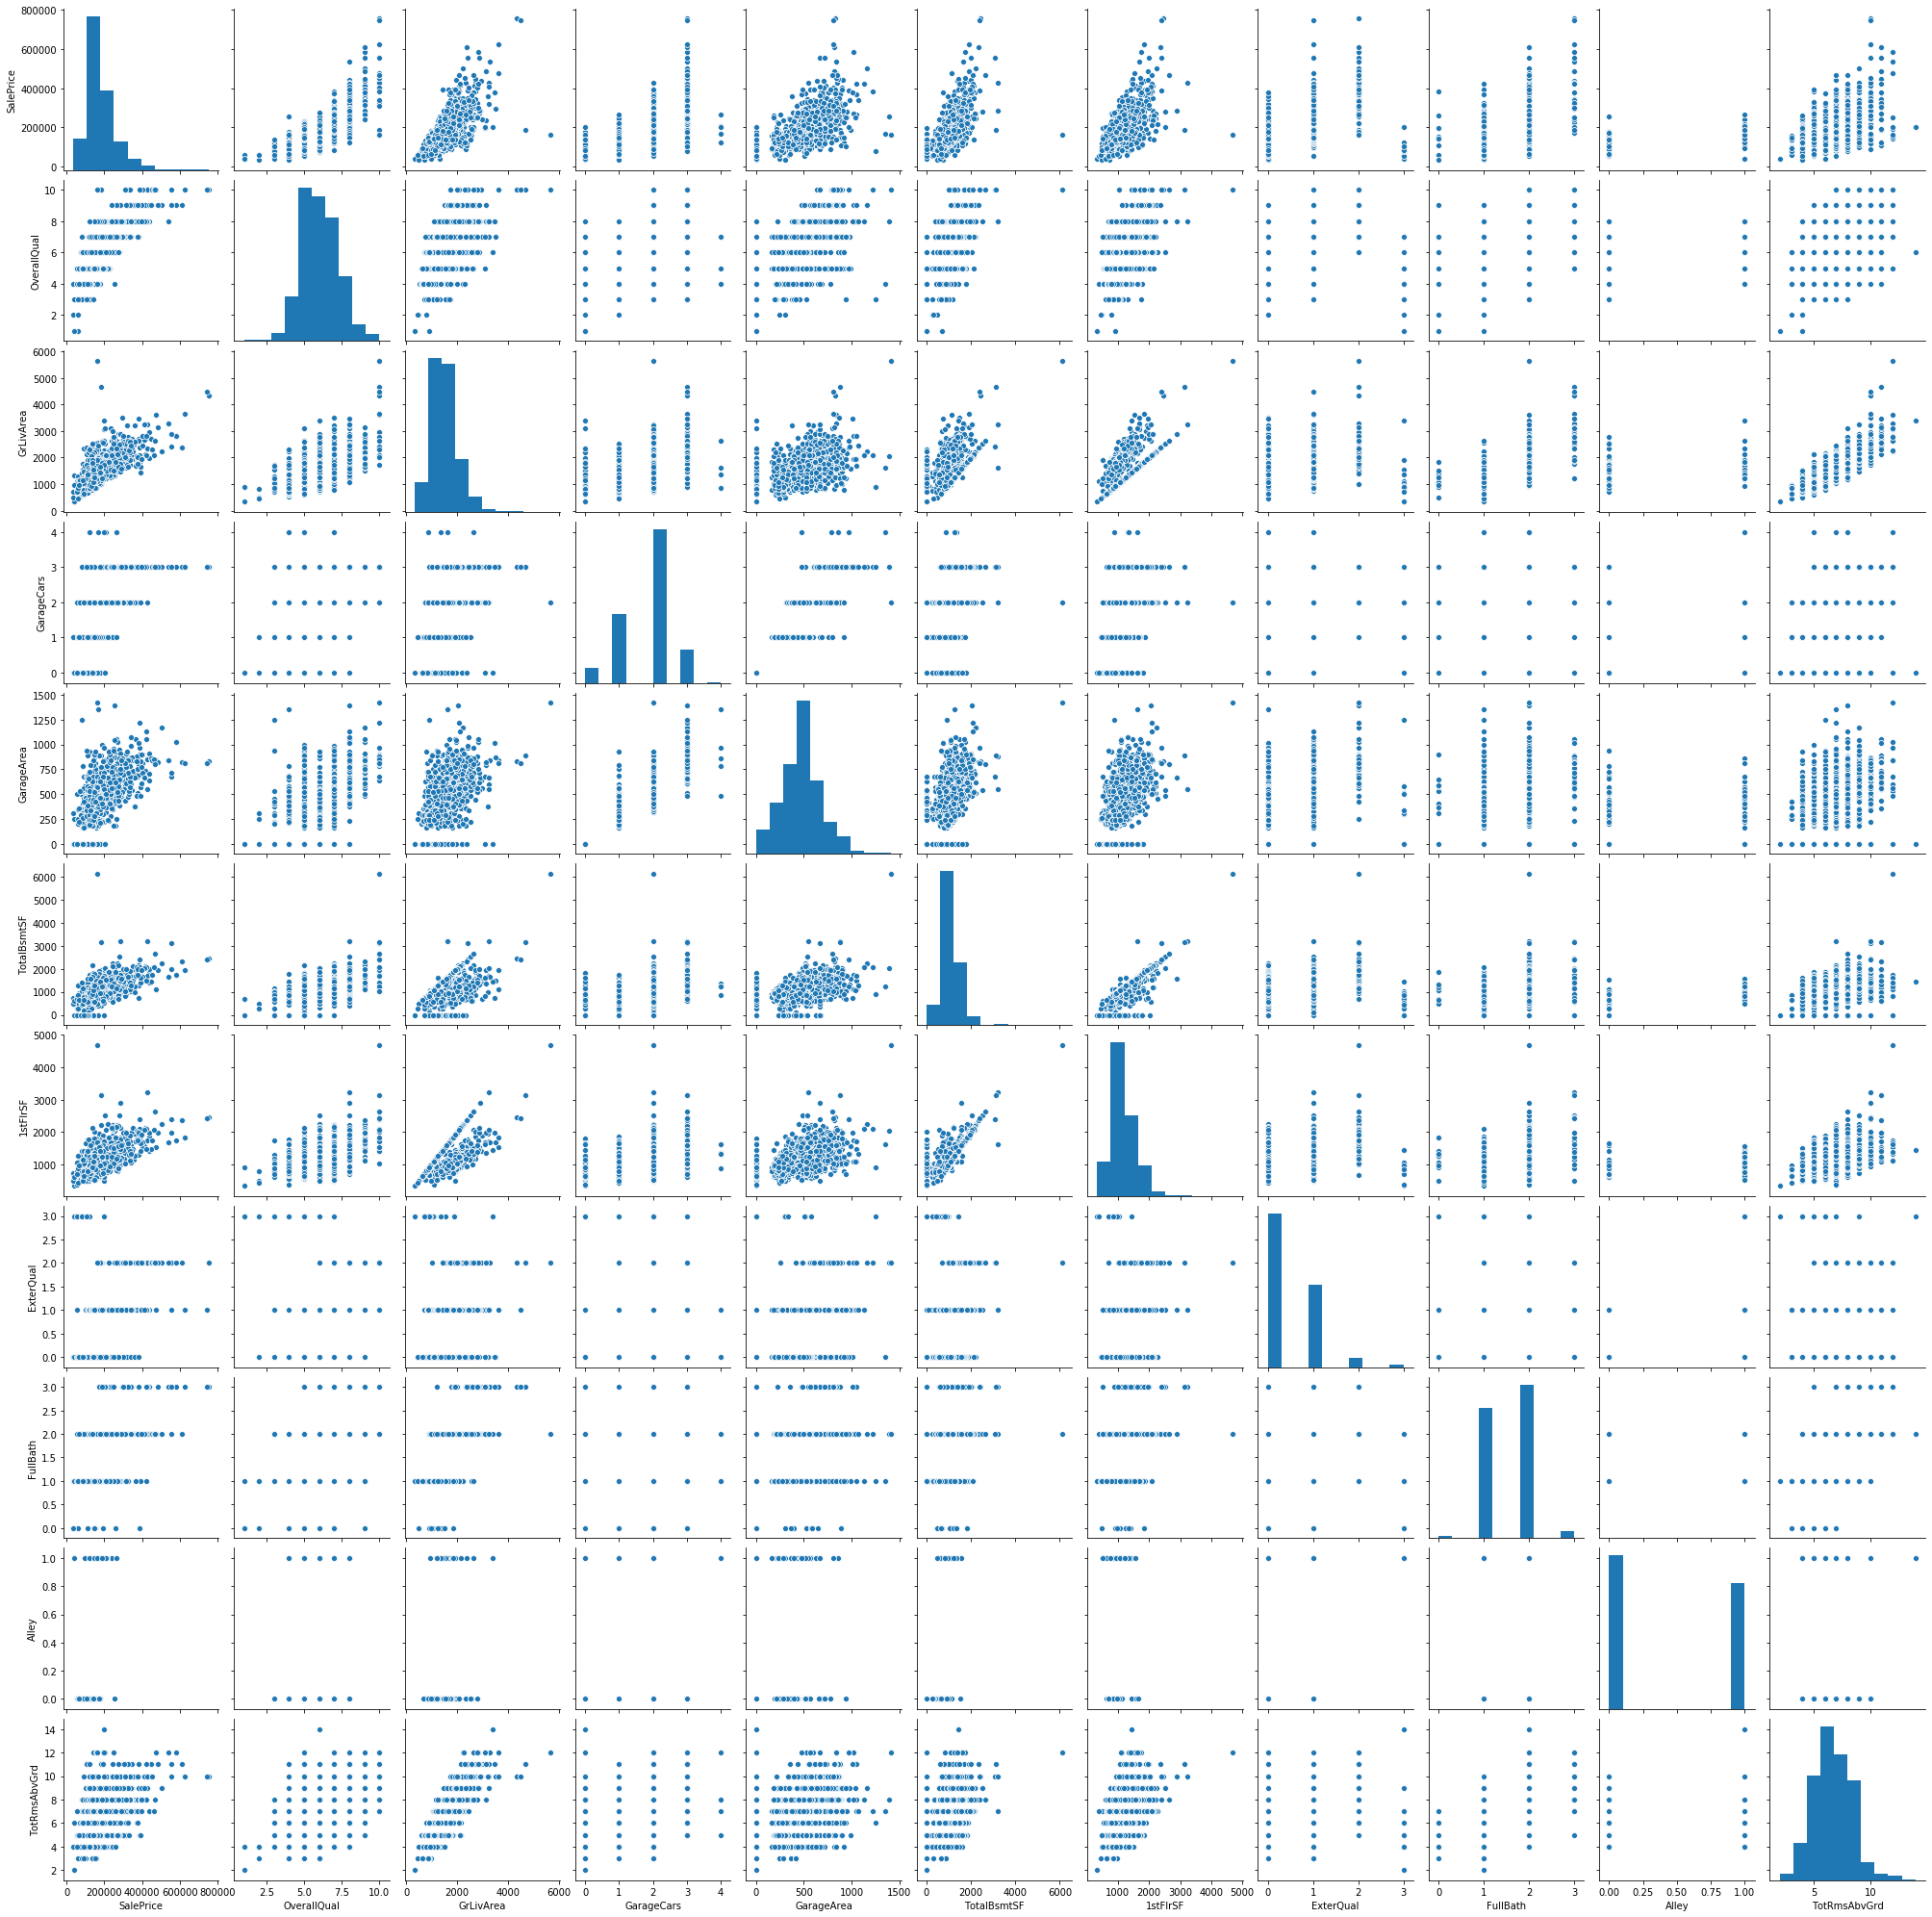

In [33]:
sns.pairplot(df6)
plt.show()

In [34]:
df6.corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual,FullBath,Alley,TotRmsAbvGrd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.567079,0.560664,0.534319,0.533723
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.576478,0.550600,0.492329,0.427452
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.369281,0.630012,0.109324,0.825489
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.417492,0.469672,0.229116,0.362289
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405679,0.405656,0.200280,0.337822
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.387253,0.323722,0.286589,0.285573
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.322600,0.380637,0.061311,0.409516
ExterQual,0.567079,0.576478,0.369281,0.417492,0.405679,0.387253,0.322600,1.000000,0.397843,0.538516,0.248486
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,0.397843,1.000000,0.405541,0.554784
Alley,0.534319,0.492329,0.109324,0.229116,0.200280,0.286589,0.061311,0.538516,0.405541,1.000000,-0.202859


欠損値を確認

In [35]:
missing_data(df6)

,Total,Percent
Alley,1369,93.767123


## Alleyの欠損値の処理

In [36]:
df6['Alley'].value_counts(dropna=False)

NaN    1369
0.0      50
1.0      41
Name: Alley, dtype: int64

In [37]:
# ヒストグラム化用関数
def hist_by_class(df, x_column_name, y_column_name, y_range=(0,0), mix=True, dropna=True):
    """
    特定の説明変数の値(class)別の目的変数の値をヒストグラム化。

    Parameters
    ----------------
    df : pd.DataFrame
      データセットのDataFrame。
    x_column_name : str
      説明変数のカラム名。
    y_column_name : str
      目的変数のカラム名。
    y_range : tuple(int, int)
      y軸の値の範囲
    mix : bool
      グラフを1つにまとめるか
    dropna : bool
      nanをスキップするか
    
    Returns
    ----------------
    None
    """
    
    # 対象カラムのvalue_counts()を取得
    df_vc = df[x_column_name].value_counts(dropna=dropna).sort_index()
#     display(df_vc)
    
    # グラフ範囲の指定
    x_min = 0
    x_max = df[y_column_name].max()
    y_min = y_range[0]
    y_max = y_range[1]
    
    # 階級数（スタージェスの公式*2：(1+log2n)*2）
    bins = int(np.log2(df[y_column_name].shape[0])*2)
    
    # 一つのグラフにまとめる場合の処理
    if mix:
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot()

        for class_value in df_vc.index:
            if not dropna and np.isnan(class_value):
                y = df[df[x_column_name].isnull()][y_column_name]
            else:
                y = df[df[x_column_name] == class_value][y_column_name]
            ax.hist(y, alpha=.5, bins=bins, label=class_value)
            ax.set_xlim(x_min, x_max)
        plt.legend(loc='best')
        plt.grid(True, alpha=.5)
        plt.show()
        
    # クラス毎にグラフを分ける場合の処理
    else:
        n2 = 3  # グラフ表示の列数
        n1 = int(np.ceil(df[x_column_name].unique().shape[0] / n2))  # グラフ表示の行数
        
        fig, axes = plt.subplots(n1, n2, figsize=(20, n1*4))
        ax = axes.ravel()
        
        for i, class_value in enumerate(df_vc.index):
            if not dropna and np.isnan(class_value):
                y = df[df[x_column_name].isnull()][y_column_name]
            else:
                y = df[df[x_column_name] == class_value][y_column_name]
#             bins = int(np.log2(y.shape[0]))
            ax[i].hist(y, bins=bins, color='blue', alpha=.4)
            ax[i].set_title(x_column_name + ' : ' + str(class_value))
            ax[i].set_xlim(x_min, x_max)
            if y_min != 0 or y_max != 0:
                ax[i].set_ylim(y_min, y_max)
            ax[i].grid(True, alpha=0.5, color='black')

#         ax[0].set_xlabel("x")
        ax[0].set_ylabel("Frequence")
        ax[n1*n2-1].set_xlabel(y_column_name)
        plt.show()

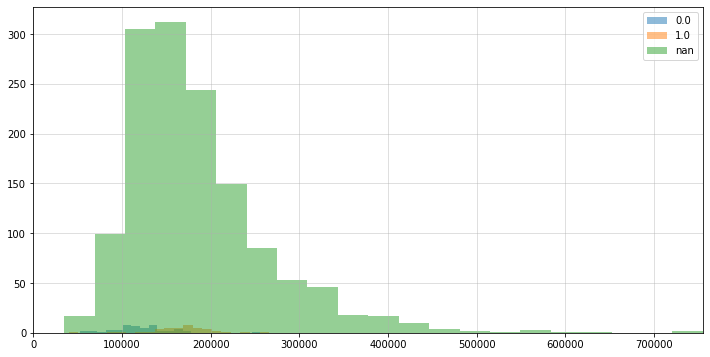

In [38]:
hist_by_class(df6, 'Alley', 'SalePrice', mix=True, dropna=False)

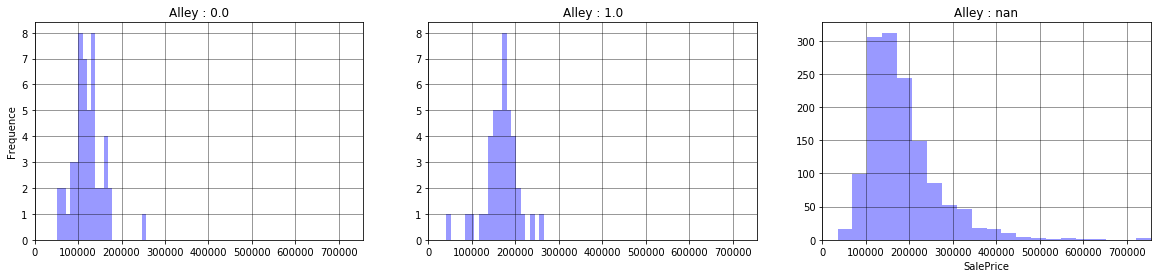

In [39]:
hist_by_class(df6, 'Alley', 'SalePrice', mix=False, dropna=False)

Alley=0.0, Aleey=1.0 と Alley=nan の分布は明らかに異なるため、0か1では埋めず、nan=3で埋める。

In [40]:
df6['Alley'] = df6['Alley'].fillna(3)
df6.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual,FullBath,Alley,TotRmsAbvGrd
0,208500,7,1710,2,548,856,856,1,2,3.0,8
1,181500,6,1262,2,460,1262,1262,0,2,3.0,6
2,223500,7,1786,2,608,920,920,1,2,3.0,6
3,140000,7,1717,3,642,756,961,0,1,3.0,7
4,250000,8,2198,3,836,1145,1145,1,2,3.0,9


In [41]:
df6['Alley'].value_counts()

3.0    1369
0.0      50
1.0      41
Name: Alley, dtype: int64

## モデル作成

In [42]:
def model_building(df, y_name, test_size=0.3, model_name='LinearRegression', cross_val=0):
    """
    モデル構築用関数。
    
    Parameters
    ----------------
    df : pd.DataFrame
      データセットのDataFrame。
    test_size : float
      train_test_splitのテストサイズ指定
    model_name : str
      --- 内容 ---
      重回帰 : LinearRegression
      サポートベクターマシン(回帰) : SVR
      決定木回帰 : DecisionTreeRegressor
      ランダムフォレスト回帰 : RandomForestRegressor

    Returns
    ----------------
    df : pd.DataFrame
    
    """
    
    # データを説明変数と目的変数へ分割
    x = df.drop(y_name, axis=1)
    y = df.loc[:, y_name]
    
    # 使用可能なモデルのリスト
    model_list = ['LinearRegression', 
                  'SVR', 
                  'DecisionTreeRegressor',
                  'RandomForestRegressor']
    
    # 引数:model のチェック
    assert model_name in model_list, "[ERROR] modelの指定が不正です。"
    
    # クラス初期化
    if model_name == model_list[0]:
        model = LinearRegression()
    elif model_name == model_list[1]:
        model = SVR()
    elif model_name == model_list[2]:
        model = DecisionTreeRegressor()
    elif model_name == model_list[3]:
        model = RandomForestRegressor()
        
    # ホールドアウト検証
    if cross_val == 0:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
        # トレーニングデータで学習
        model.fit(x_train, y_train)
    
#     # 交差検証
#     else:
#         scores = cross_val_score(lr, X, y, cv=cross_val)
#         # 表示
#         print('Cross-validation scores : {}'.format(scores))
#         print('Average cross-validation score : {}'.format(scores.mean()))
    
    # 予測実行
    y_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    # 決定係数を表示
    print('決定係数R^2(train) : {:.3f}'.format(model.score(x_train, y_train)))
    print('決定係数R^2(test) : {:.3f}'. format(model.score(x_test, y_test)))
    
    # 切片・回帰係数を表示
    if model_name == model_list[0]:
        print('回帰係数 : \n{}'.format(pd.Series(model.coef_.reshape(len(model.coef_)), index=x.columns)))
        print('切片 : {:.3f}'.format(model.intercept_))

    # MSE(平均二乗誤差)
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print('MAE(平均二乗誤差)(train) : {:.3f}'.format(mse_train))
    print('MAE(平均二乗誤差)(test) : {:.3f}'.format(mse))
    
    return model

In [43]:
lr = model_building(df6, 'SalePrice', model_name='LinearRegression')

決定係数R^2(train) : 0.798
決定係数R^2(test) : 0.706
回帰係数 : 
OverallQual     19773.371175
GrLivArea          51.300592
GarageCars       4683.644537
GarageArea         45.596903
TotalBsmtSF        29.786016
1stFlrSF           10.138446
ExterQual       13379.185579
FullBath         -999.822185
Alley            7172.669490
TotRmsAbvGrd     -956.962144
dtype: float64
切片 : -108888.048
MAE(平均二乗誤差)(train) : 1231449065.779
MAE(平均二乗誤差)(test) : 1993852115.066


In [44]:
svr = model_building(df6, 'SalePrice', model_name='SVR')

決定係数R^2(train) : -0.049
決定係数R^2(test) : -0.050
MAE(平均二乗誤差)(train) : 6400568633.361
MAE(平均二乗誤差)(test) : 7130075595.452


In [45]:
dt = model_building(df6, 'SalePrice', model_name='DecisionTreeRegressor')

決定係数R^2(train) : 1.000
決定係数R^2(test) : 0.729
MAE(平均二乗誤差)(train) : 1532297.782
MAE(平均二乗誤差)(test) : 1838374548.116


In [46]:
rf = model_building(df6, 'SalePrice', model_name='RandomForestRegressor')

決定係数R^2(train) : 0.971
決定係数R^2(test) : 0.851
MAE(平均二乗誤差)(train) : 174813743.350
MAE(平均二乗誤差)(test) : 1010655348.691


変数が２種の時より全体的にやや精度が上がっているが、SVRのみ大きく悪化している。

ただし、決定木に関しては完全にオーバーフィッティングしているため、分岐数を減らすなどの対応が必要

## SalePriceを対数変換して再実行

対数変換前


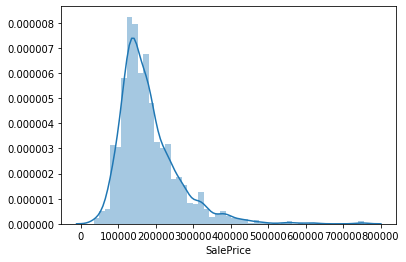

対数変換前


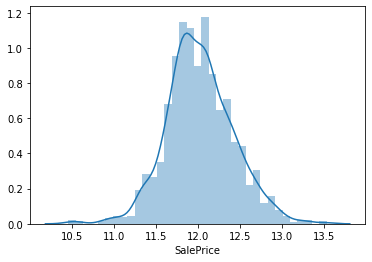

In [47]:
print('対数変換前')
sns.distplot(df6['SalePrice'])
plt.show()

# 対数変換
df6['SalePrice'] = df6['SalePrice'].map(np.log)

print('対数変換前')
sns.distplot(df6['SalePrice'])
plt.show()

In [48]:
lr2 = model_building(df6, 'SalePrice', model_name='LinearRegression')

決定係数R^2(train) : 0.813
決定係数R^2(test) : 0.750
回帰係数 : 
OverallQual     0.118019
GrLivArea       0.000214
GarageCars      0.066012
GarageArea      0.000179
TotalBsmtSF     0.000163
1stFlrSF        0.000029
ExterQual       0.000120
FullBath        0.034762
Alley           0.044452
TotRmsAbvGrd   -0.003403
dtype: float64
切片 : 10.413
MAE(平均二乗誤差)(train) : 0.030
MAE(平均二乗誤差)(test) : 0.039


In [49]:
svr2 = model_building(df6, 'SalePrice', model_name='SVR')

決定係数R^2(train) : 0.751
決定係数R^2(test) : 0.752
MAE(平均二乗誤差)(train) : 0.040
MAE(平均二乗誤差)(test) : 0.038


In [50]:
dt2 = model_building(df6, 'SalePrice', model_name='DecisionTreeRegressor')

決定係数R^2(train) : 0.999
決定係数R^2(test) : 0.684
MAE(平均二乗誤差)(train) : 0.000
MAE(平均二乗誤差)(test) : 0.049


In [51]:
rf2 = model_building(df6, 'SalePrice', model_name='RandomForestRegressor')

決定係数R^2(train) : 0.972
決定係数R^2(test) : 0.839
MAE(平均二乗誤差)(train) : 0.005
MAE(平均二乗誤差)(test) : 0.025


対数変換により、ロジスティック回帰・SVRでは精度が改善したものの、

決定木・ランダムフォレストでは精度がやや悪化した。

## GarageCarsとGarageAreaには強い相関があるため、GarageAreaをdropして再実行

In [52]:
df7 = df6.drop('GarageArea', axis=1)
df7.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,ExterQual,FullBath,Alley,TotRmsAbvGrd
0,12.247694,7,1710,2,856,856,1,2,3.0,8
1,12.109011,6,1262,2,1262,1262,0,2,3.0,6
2,12.317167,7,1786,2,920,920,1,2,3.0,6
3,11.849398,7,1717,3,756,961,0,1,3.0,7
4,12.429216,8,2198,3,1145,1145,1,2,3.0,9


In [53]:
lr3 = model_building(df7, 'SalePrice', model_name='LinearRegression')

決定係数R^2(train) : 0.812
決定係数R^2(test) : 0.758
回帰係数 : 
OverallQual     0.117707
GrLivArea       0.000219
GarageCars      0.109484
TotalBsmtSF     0.000167
1stFlrSF        0.000036
ExterQual       0.001266
FullBath        0.031374
Alley           0.044483
TotRmsAbvGrd   -0.004406
dtype: float64
切片 : 10.415
MAE(平均二乗誤差)(train) : 0.030
MAE(平均二乗誤差)(test) : 0.037


In [54]:
svr3 = model_building(df7, 'SalePrice', model_name='SVR')

決定係数R^2(train) : 0.687
決定係数R^2(test) : 0.689
MAE(平均二乗誤差)(train) : 0.051
MAE(平均二乗誤差)(test) : 0.048


In [55]:
dt3 = model_building(df7, 'SalePrice', model_name='DecisionTreeRegressor')

決定係数R^2(train) : 0.997
決定係数R^2(test) : 0.665
MAE(平均二乗誤差)(train) : 0.000
MAE(平均二乗誤差)(test) : 0.052


In [56]:
rf2 = model_building(df7, 'SalePrice', model_name='RandomForestRegressor')

決定係数R^2(train) : 0.969
決定係数R^2(test) : 0.833
MAE(平均二乗誤差)(train) : 0.005
MAE(平均二乗誤差)(test) : 0.026


誤差の可能性もあるが、ロジスティック回帰でやや精度が向上した。